In [2]:
# Step 1: Load the dataset
import pandas as pd

# Load the CSV file
data = pd.read_csv('Largest_companies.csv')

# Inspect the first few rows of the dataset
print(data.head())

# Check for missing values and basic data types
print(data.info())


   Rank                Name                    Industry  \
0     1             Walmart                      Retail   
1     2              Amazon  Retail and Cloud Computing   
2     3         Exxon Mobil          Petroleum industry   
3     4               Apple        Electronics industry   
4     5  UnitedHealth Group                  Healthcare   

  Revenue (USD millions) Revenue growth  Employees           Headquarters  
0                611,289           6.7%  2,100,000  Bentonville, Arkansas  
1                513,983           9.4%  1,540,000    Seattle, Washington  
2                413,680          44.8%     62,000          Spring, Texas  
3                394,328           7.8%    164,000  Cupertino, California  
4                324,162          12.7%    400,000  Minnetonka, Minnesota  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  -----

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing essential values (e.g., Name or Industry)
data_cleaned = data.dropna(subset=['Name', 'Industry'])

# Reset the index after cleaning
data_cleaned = data_cleaned.reset_index(drop=True)


Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64


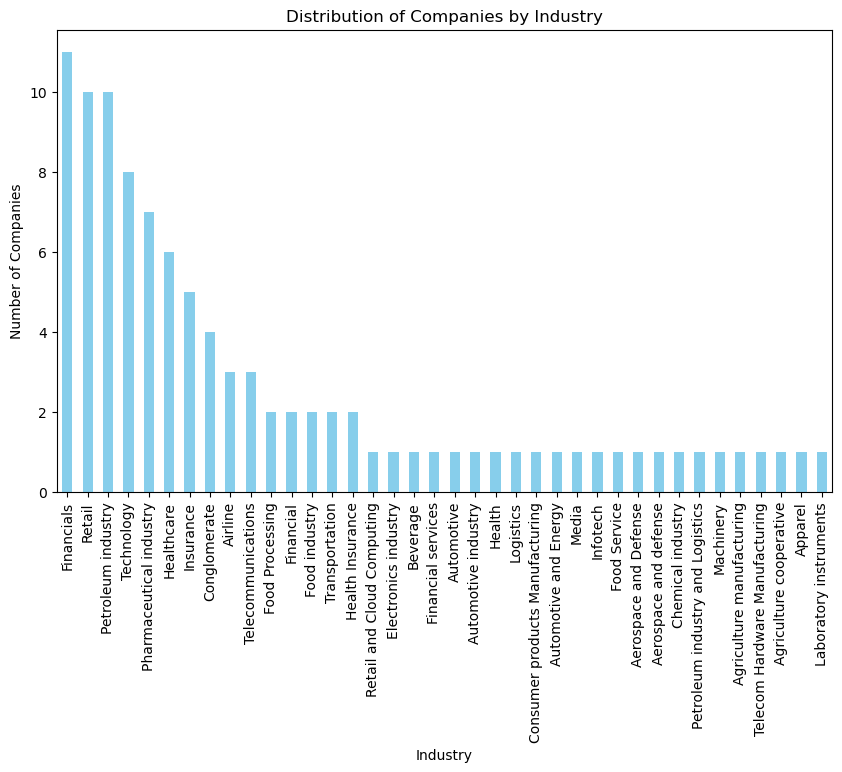


Top Ranked Companies by Industry:
 Industry
Aerospace and Defense               62
Aerospace and defense               60
Agriculture cooperative             92
Agriculture manufacturing           83
Airline                             87
Apparel                             95
Automotive                          21
Automotive and Energy               50
Automotive industry                 19
Beverage                            46
Chemical industry                   77
Conglomerate                         7
Consumer products Manufacturing     51
Electronics industry                 4
Financial                           79
Financial services                  23
Financials                          28
Food Processing                     82
Food Service                        57
Food industry                       35
Health                               9
Health Insurance                    15
Healthcare                           5
Infotech                            66
Insurance          

In [4]:
# Analyze the distribution of companies by industry
industry_distribution = data_cleaned['Industry'].value_counts()

# Visualize the industry distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
industry_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Companies by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

# Analyze the top-ranked companies by industry
top_ranked = data_cleaned.groupby('Industry')['Rank'].min()

# Display the top-ranked companies in each industry
print("\nTop Ranked Companies by Industry:\n", top_ranked)


In [5]:
# Categorize industries into tiers
def categorize_rank(rank):
    if rank <= 20:
        return 'High Performing'
    elif 21 <= rank <= 60:
        return 'Mid Performing'
    else:
        return 'Low Performing'

# Apply this categorization
data_cleaned['Performance Category'] = data_cleaned['Rank'].apply(categorize_rank)

# Group the data by performance category and industry
performance_by_industry = data_cleaned.groupby('Performance Category')['Industry'].value_counts()

# Display the result
print(performance_by_industry)


Performance Category  Industry                        
High Performing       Petroleum industry                  5
                      Healthcare                          3
                      Retail                              3
                      Technology                          2
                      Automotive industry                 1
                      Conglomerate                        1
                      Electronics industry                1
                      Health                              1
                      Pharmaceutical industry             1
                      Health Insurance                    1
                      Retail and Cloud Computing          1
Low Performing        Insurance                           5
                      Technology                          4
                      Pharmaceutical industry             3
                      Retail                              3
                      Financials             

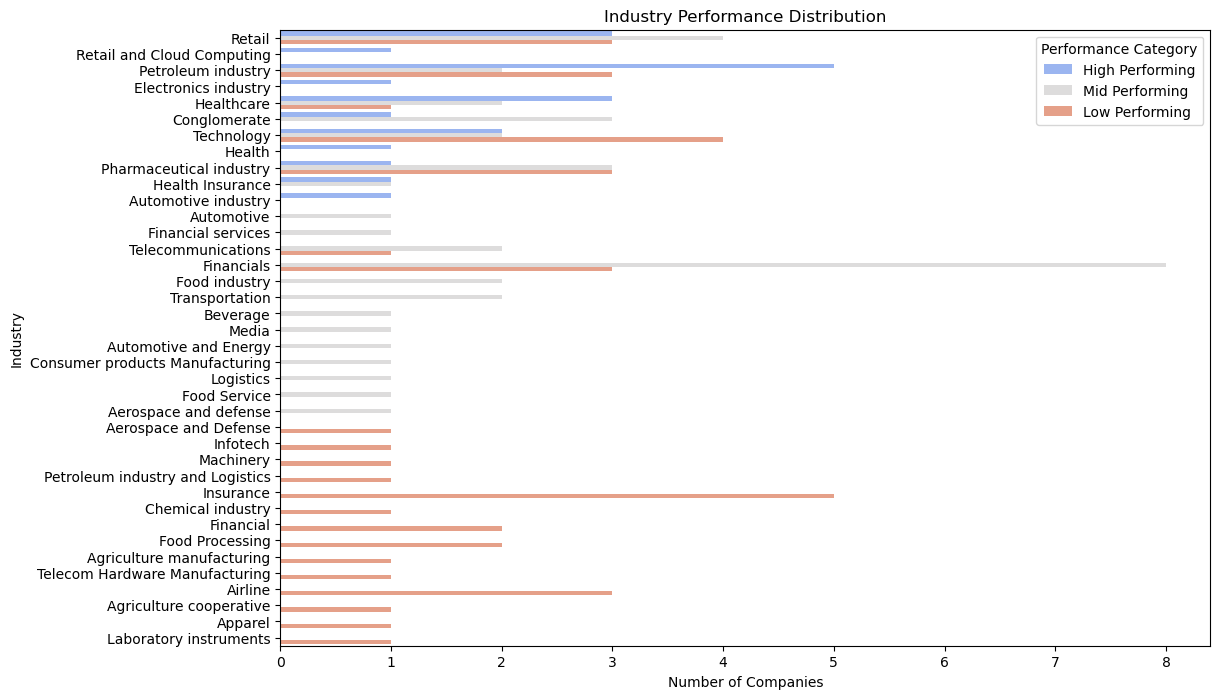

In [6]:
# Visualize the industry distribution across performance categories
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y='Industry', hue='Performance Category', data=data_cleaned, palette='coolwarm')
plt.title('Industry Performance Distribution')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.legend(title='Performance Category')
plt.show()


In [7]:
# Analyze the spread of rankings within each industry to assess competitiveness
rank_spread_by_industry = data_cleaned.groupby('Industry')['Rank'].agg(['min', 'max', 'mean'])
rank_spread_by_industry['Spread'] = rank_spread_by_industry['max'] - rank_spread_by_industry['min']

# Display industries with the highest and lowest competitiveness (rank spread)
most_competitive_industries = rank_spread_by_industry.sort_values(by='Spread').head(10)
least_competitive_industries = rank_spread_by_industry.sort_values(by='Spread', ascending=False).head(10)

print("Most Competitive Industries:\n", most_competitive_industries)
print("\nLeast Competitive Industries:\n", least_competitive_industries)


Most Competitive Industries:
                            min  max  mean  Spread
Industry                                         
Aerospace and Defense       62   62  62.0       0
Aerospace and defense       60   60  60.0       0
Agriculture cooperative     92   92  92.0       0
Agriculture manufacturing   83   83  83.0       0
Apparel                     95   95  95.0       0
Automotive                  21   21  21.0       0
Automotive and Energy       50   50  50.0       0
Automotive industry         19   19  19.0       0
Financial services          23   23  23.0       0
Beverage                    46   46  46.0       0

Least Competitive Industries:
                          min  max       mean  Spread
Industry                                            
Retail                     1   96  44.700000      95
Technology                 8  100  47.750000      92
Petroleum industry         3   94  40.000000      91
Pharmaceutical industry   11   97  51.285714      86
Healthcare          

Predicted future ranks for 'Technology' industry: [ 9. 10. 11. 12. 13.]


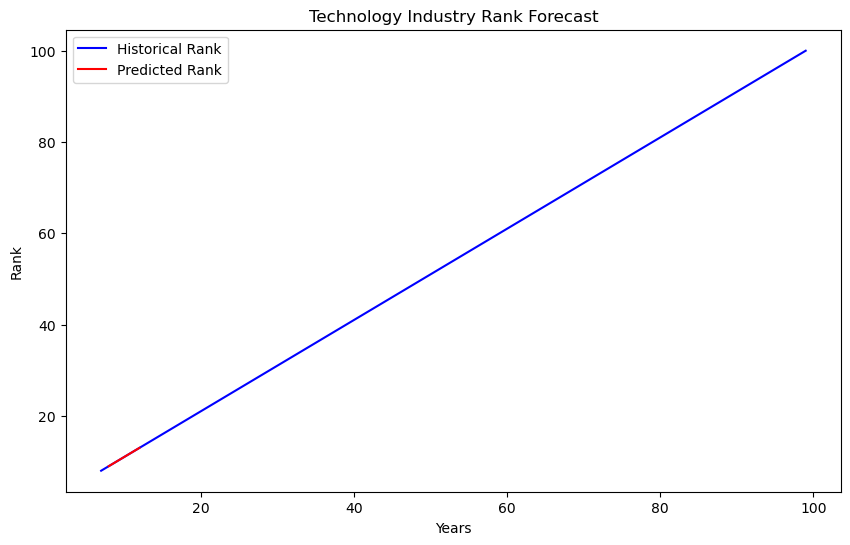

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example: Forecasting future rank for the "Technology" industry
industry_data = data_cleaned[data_cleaned['Industry'] == 'Technology']

# Create a simple linear regression model to predict future ranks
X = np.array(industry_data.index).reshape(-1, 1)  # Use index as the time variable
y = industry_data['Rank']

model = LinearRegression()
model.fit(X, y)

# Predict the next 5 years of ranking
future_indices = np.array([len(industry_data) + i for i in range(5)]).reshape(-1, 1)
predicted_ranks = model.predict(future_indices)

print("Predicted future ranks for 'Technology' industry:", predicted_ranks)

# Visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(industry_data.index, industry_data['Rank'], label='Historical Rank', color='blue')
plt.plot(future_indices, predicted_ranks, label='Predicted Rank', color='red')
plt.xlabel('Years')
plt.ylabel('Rank')
plt.title('Technology Industry Rank Forecast')
plt.legend()
plt.show()


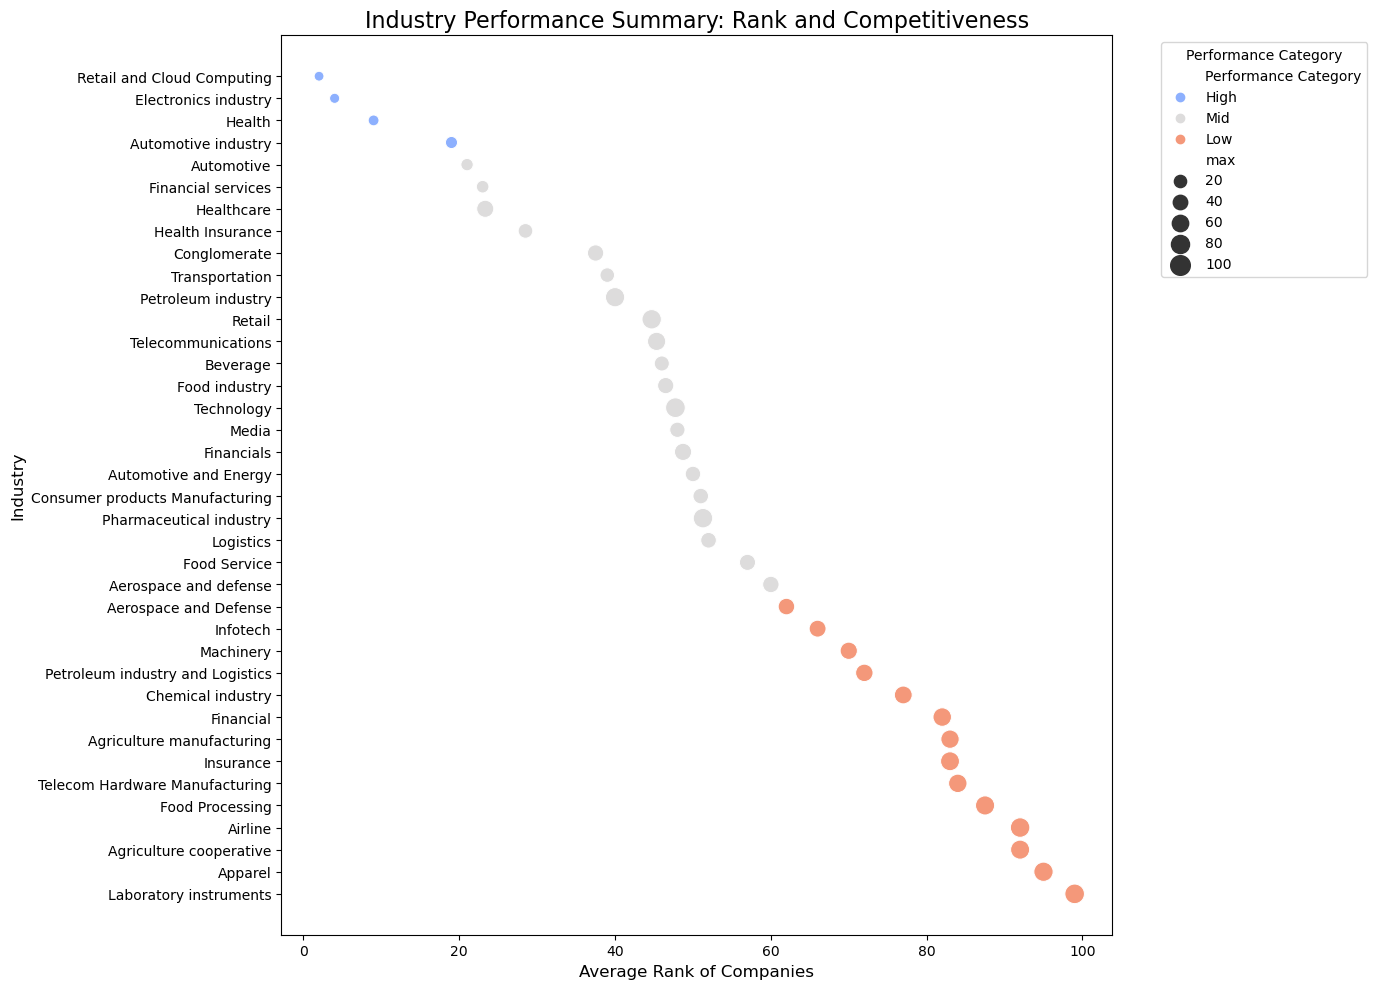

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_cleaned' is already defined from your dataset with the columns: 'Industry' and 'Rank'

# Step 1: Group industries by their ranking information (min, max, and average ranks)
performance_summary = data_cleaned.groupby('Industry')['Rank'].agg(['min', 'max', 'mean'])

# Step 2: Define performance categories based on the average rank
performance_summary['Performance Category'] = performance_summary['mean'].apply(
    lambda x: 'High' if x <= 20 else 'Mid' if 21 <= x <= 60 else 'Low')

# Step 3: Sort industries by their average rank
performance_summary = performance_summary.sort_values(by='mean')

# Step 4: Plotting the performance summary with size and color
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='mean', 
    y=performance_summary.index, 
    hue='Performance Category', 
    size='max', 
    sizes=(50, 200), 
    data=performance_summary, 
    palette='coolwarm', 
    legend="brief"
)

# Add labels and title for the plot
plt.title('Industry Performance Summary: Rank and Competitiveness', fontsize=16)
plt.xlabel('Average Rank of Companies', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.legend(title='Performance Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
